In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
supermarket = pd.read_csv("Supermart.csv")

In [3]:
supermarket

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [4]:
supermarket = supermarket.drop(['Order ID','Customer Name','State'],axis=1)

In [5]:
supermarket['Order Date'] = pd.to_datetime(supermarket['Order Date'])

In [6]:
supermarket['Order_day'] = supermarket['Order Date'].dt.day
supermarket['Order_month'] = supermarket['Order Date'].dt.month
supermarket['Order_year'] = supermarket['Order Date'].dt.year

In [7]:
supermarket = supermarket.drop(['Order Date'],axis=1)

In [8]:
supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      9994 non-null   object 
 1   Sub Category  9994 non-null   object 
 2   City          9994 non-null   object 
 3   Region        9994 non-null   object 
 4   Sales         9994 non-null   int64  
 5   Discount      9994 non-null   float64
 6   Profit        9994 non-null   float64
 7   Order_day     9994 non-null   int64  
 8   Order_month   9994 non-null   int64  
 9   Order_year    9994 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 780.9+ KB


In [9]:
supermarket.describe()

,Sales,Discount,Profit,Order_day,Order_month,Order_year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082,15.468381,7.809686,2016.722233
std,577.559036,0.074636,239.932881,8.748178,3.284654,1.123555
min,500.000000,0.100000,25.250000,1.000000,1.000000,2015.000000
25%,1000.000000,0.160000,180.022500,8.000000,5.000000,2016.000000
50%,1498.000000,0.230000,320.780000,15.000000,9.000000,2017.000000
75%,1994.750000,0.290000,525.627500,23.000000,11.000000,2018.000000
max,2500.000000,0.350000,1120.950000,31.000000,12.000000,2018.000000


<Axes: xlabel='Sales', ylabel='Count'>

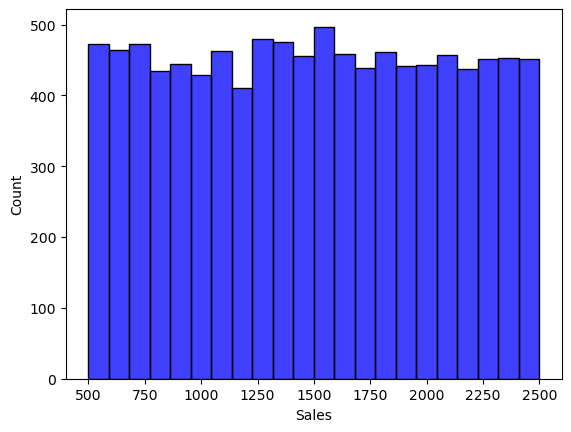

In [10]:
sns.histplot(x = 'Sales',data = supermarket,color = 'blue')

<Axes: xlabel='Sales', ylabel='Category'>

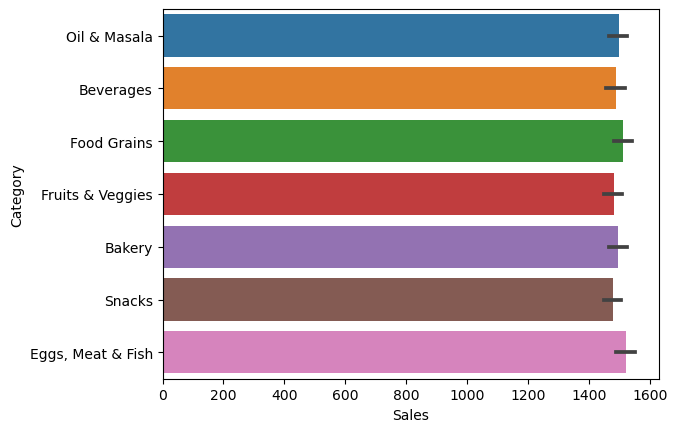

In [11]:
sns.barplot(x = 'Sales', y = 'Category', data = supermarket)

<Axes: xlabel='Sales', ylabel='Sub Category'>

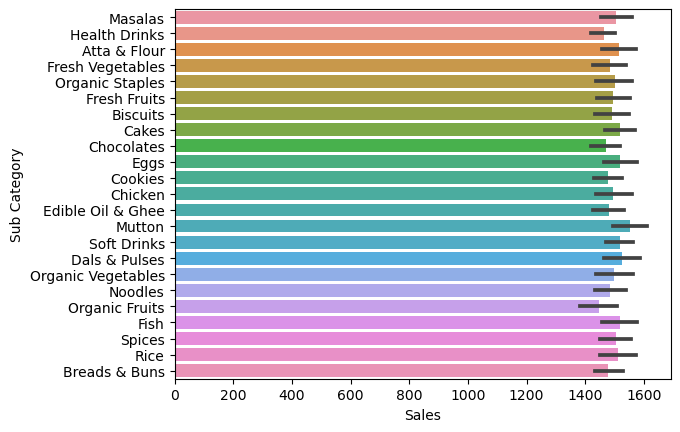

In [12]:
sns.barplot(x = 'Sales', y = 'Sub Category', data = supermarket)

<Axes: xlabel='Region', ylabel='Sales'>

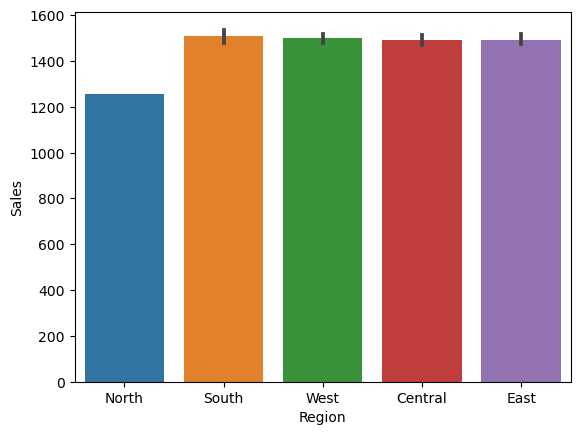

In [13]:
sns.barplot(x = 'Region', y = 'Sales', data = supermarket)

<Axes: xlabel='Sales', ylabel='City'>

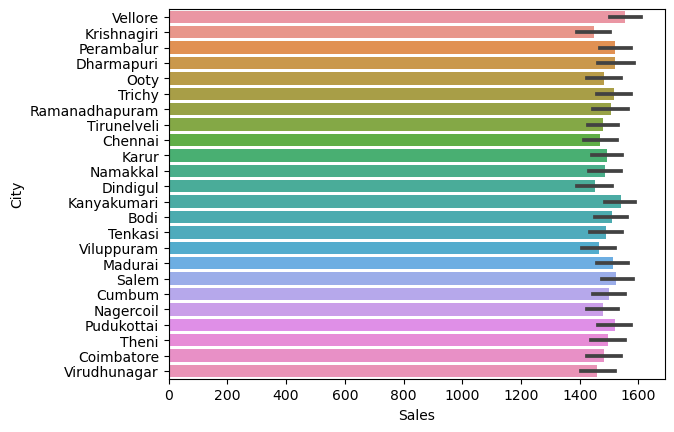

In [14]:
sns.barplot(x = 'Sales', y = 'City', data = supermarket)

In [15]:
from sklearn.preprocessing import LabelEncoder

cols = ['Category','Sub Category','Region','City','Sales']
supermarket[cols] = supermarket[cols].apply(LabelEncoder().fit_transform)
supermarket.head()

,Category,Sub Category,City,Region,Sales,Discount,Profit,Order_day,Order_month,Order_year
0,5,14,21,2,748,0.12,401.28,8,11,2017
1,1,13,8,3,246,0.18,149.80,8,11,2017
2,3,0,13,4,1849,0.21,165.20,12,6,2017
3,4,12,4,3,393,0.25,89.60,11,10,2016
4,3,18,12,3,1845,0.26,918.45,11,10,2016


In [16]:
cluster_data = supermarket
cluster_data.head()

,Category,Sub Category,City,Region,Sales,Discount,Profit,Order_day,Order_month,Order_year
0,5,14,21,2,748,0.12,401.28,8,11,2017
1,1,13,8,3,246,0.18,149.80,8,11,2017
2,3,0,13,4,1849,0.21,165.20,12,6,2017
3,4,12,4,3,393,0.25,89.60,11,10,2016
4,3,18,12,3,1845,0.26,918.45,11,10,2016


In [17]:
from sklearn.cluster import KMeans
clustering_kmeans = KMeans(n_clusters=3)
cluster_data['clusters'] = clustering_kmeans.fit_predict(cluster_data)
cluster_data

,Category,Sub Category,City,Region,Sales,Discount,Profit,Order_day,Order_month,Order_year,clusters
0,5,14,21,2,748,0.12,401.28,8,11,2017,0
1,1,13,8,3,246,0.18,149.80,8,11,2017,2
2,3,0,13,4,1849,0.21,165.20,12,6,2017,1
3,4,12,4,3,393,0.25,89.60,11,10,2016,2
4,3,18,12,3,1845,0.26,918.45,11,10,2016,1
...,...,...,...,...,...,...,...,...,...,...,...
9989,2,9,9,4,442,0.16,359.10,24,12,2015,2
9990,0,1,6,4,690,0.26,71.70,12,7,2015,2
9991,3,20,0,4,1059,0.16,501.44,6,6,2017,0
9992,5,22,14,4,1150,0.15,597.24,16,10,2018,0


In [18]:
cluster_data['clusters'].value_counts()

0    3414
1    3304
2    3276
Name: clusters, dtype: int64

In [19]:
labels = clustering_kmeans.labels_
labels

array([0, 2, 1, ..., 0, 0, 2])

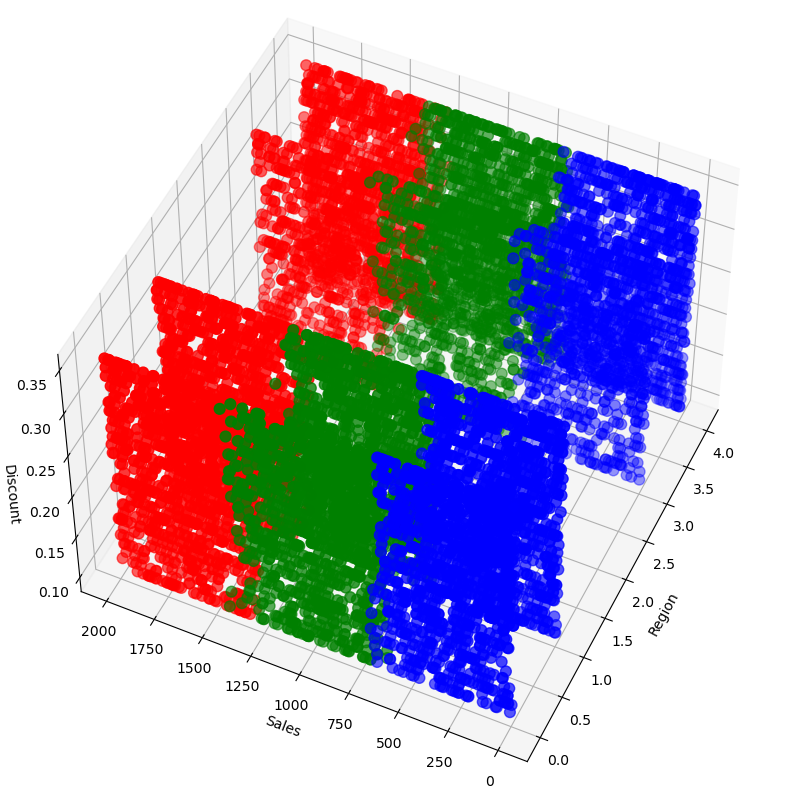

In [20]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data.Region[labels == 0], cluster_data["Sales"][labels == 0], cluster_data["Discount"][labels == 0],  c='green', s=60)
ax.scatter(cluster_data.Region[labels == 1], cluster_data["Sales"][labels == 1], cluster_data["Discount"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.Region[labels == 2], cluster_data["Sales"][labels == 2], cluster_data["Discount"][labels == 2],  c='blue', s=60)
ax.view_init(50, 205)

plt.xlabel("Region")
plt.ylabel("Sales")
ax.set_zlabel('Discount')
plt.show()

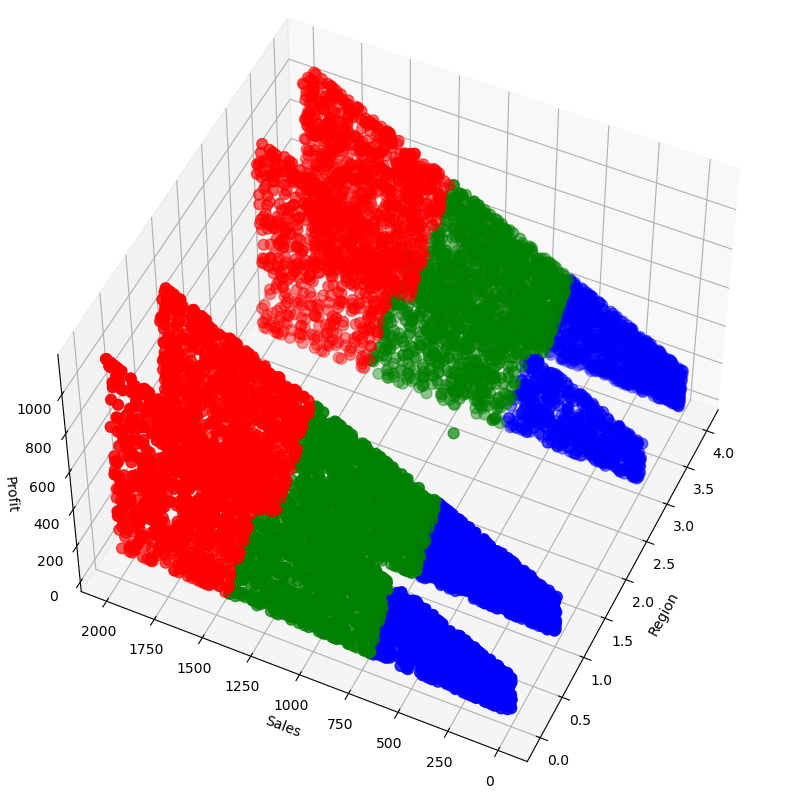

In [21]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection='3d')
ax.scatter(cluster_data.Region[labels == 0], cluster_data["Sales"][labels == 0], cluster_data["Profit"][labels == 0],  c='green', s=60)
ax.scatter(cluster_data.Region[labels == 1], cluster_data["Sales"][labels == 1], cluster_data["Profit"][labels == 1],  c='red', s=60)
ax.scatter(cluster_data.Region[labels == 2], cluster_data["Sales"][labels == 2], cluster_data["Profit"][labels == 2],  c='blue', s=60)
ax.view_init(50, 205)

plt.xlabel("Region")
plt.ylabel("Sales")
ax.set_zlabel('Profit')
plt.show()